<a href="https://colab.research.google.com/github/HarshaLokesh/Machine_learning_for_intelligent_vehicles/blob/main/Accidenct_avoidence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import math

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Accident_data.xlsx to Accident_data.xlsx


In [ ]:
crash_data = pd.read_excel("Accident_data.xlsx")
crash_data.head()

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,ROADWAY_CONDITION,ROAD_DEFECT,CRASH_TYPE,PRIMARY_CAUSE,MOST_SEVERE_INJURY,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,35,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,IMPROPER BACKING,1,17,4,7,41.919664,-87.773288,POINT (-87.773287883007 41.919663832993)
1,35,STOP SIGN/FLASHER,CLEAR,DAYLIGHT,TURNING,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,FAILING TO YIELD RIGHT-OF-WAY,1,16,6,6,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)
2,30,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,FAILING TO YIELD RIGHT-OF-WAY,1,10,6,7,41.773456,-87.585022,POINT (-87.585022352022 41.773455972008)
3,30,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE OPPOSITE DIRECTION,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...",2,22,6,7,41.880386,-87.725807,POINT (-87.725807044026 41.880385884998)
4,25,NO CONTROLS,RAIN,DAYLIGHT,ANGLE,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,FAILING TO YIELD RIGHT-OF-WAY,1,11,4,5,41.721290,-87.628510,POINT (-87.628509593966 41.72128957001)


In [ ]:
crash_data.describe()

,POSTED_SPEED_LIMIT,MOST_SEVERE_INJURY,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,56736.000000,56736.000000,56736.000000,56736.000000,56736.000000,56736.000000,56736.000000
mean,29.143613,1.144688,13.468838,4.231599,7.000247,41.842001,-87.670864
std,6.624081,0.418554,5.462998,2.009780,3.209909,0.082257,0.061495
min,0.000000,1.000000,0.000000,1.000000,1.000000,41.644670,-87.933994
25%,30.000000,1.000000,10.000000,2.000000,5.000000,41.772635,-87.714380
50%,30.000000,1.000000,14.000000,4.000000,7.000000,41.852852,-87.660404
75%,30.000000,1.000000,17.000000,6.000000,10.000000,41.899765,-87.625284
max,99.000000,4.000000,23.000000,7.000000,12.000000,42.022780,-87.525075


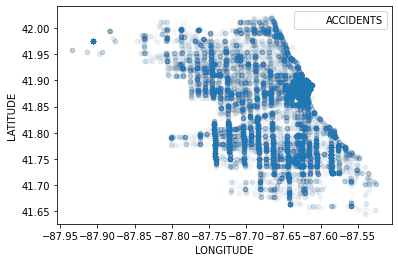

In [ ]:
crash_data.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", alpha=0.01, label="ACCIDENTS")


#Location of accidents with most severity

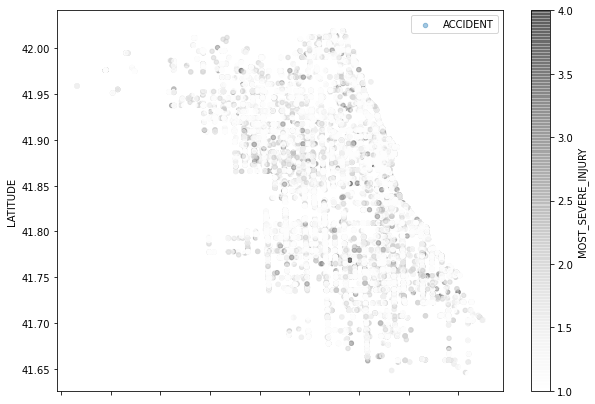

In [ ]:
import matplotlib.pyplot as plt
crash_data.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", alpha=0.4,
    label="ACCIDENT",c = "MOST_SEVERE_INJURY", figsize=(10,7), colorbar=True)


#Converting all catogorial data into numerical form

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df = pd.DataFrame(crash_data)
df["TRAFFIC_CONTROL_DEVICE"] = encoder.fit_transform(crash_data["TRAFFIC_CONTROL_DEVICE"])
df["WEATHER_CONDITION"] = encoder.fit_transform(crash_data["WEATHER_CONDITION"])
df["LIGHTING_CONDITION"] = encoder.fit_transform(crash_data["LIGHTING_CONDITION"])
df["FIRST_CRASH_TYPE"] = encoder.fit_transform(crash_data["FIRST_CRASH_TYPE"])
df["ROADWAY_CONDITION"] = encoder.fit_transform(crash_data["ROADWAY_CONDITION"])
df["ROAD_DEFECT"] = encoder.fit_transform(crash_data["ROAD_DEFECT"])
df["PRIMARY_CAUSE"] = encoder.fit_transform(crash_data["PRIMARY_CAUSE"]) 
df["CRASH_TYPE"] = encoder.fit_transform(crash_data["CRASH_TYPE"])
df.head()

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,ROADWAY_CONDITION,ROAD_DEFECT,CRASH_TYPE,PRIMARY_CAUSE,MOST_SEVERE_INJURY,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,35,4,1,3,17,0,1,1,21,1,17,4,7,41.919664,-87.773288,POINT (-87.773287883007 41.919663832993)
1,35,15,1,3,17,0,1,0,18,1,16,6,6,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)
2,30,16,1,3,10,0,1,1,18,1,10,6,7,41.773456,-87.585022,POINT (-87.585022352022 41.773455972008)
3,30,4,1,1,14,0,1,0,28,2,22,6,7,41.880386,-87.725807,POINT (-87.725807044026 41.880385884998)
4,25,4,6,3,0,5,1,1,18,1,11,4,5,41.721290,-87.628510,POINT (-87.628509593966 41.72128957001)


In [ ]:
df.drop('LOCATION',axis = 1, inplace=True)
df.tail()

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,ROADWAY_CONDITION,ROAD_DEFECT,CRASH_TYPE,PRIMARY_CAUSE,MOST_SEVERE_INJURY,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
56731,30,16,6,1,17,5,5,0,18,1,4,3,7,41.823097,-87.685019
56732,30,16,1,2,15,0,1,0,22,1,6,3,7,41.873185,-87.745147
56733,40,4,6,2,2,5,1,0,26,1,5,3,7,41.985650,-87.655336
56734,30,16,1,3,10,0,1,1,19,1,14,3,7,41.773439,-87.566899
56735,10,4,1,3,7,0,1,1,26,1,18,2,7,41.736965,-87.721652


#Classification of the dataset


In [ ]:
X=df.drop('CRASH_TYPE',axis=1).values    
y=df['CRASH_TYPE'].values
X,y


(array([[ 35.        ,   4.        ,   1.        , ...,   7.        ,
          41.91966383, -87.77328788],
        [ 35.        ,  15.        ,   1.        , ...,   6.        ,
          41.7418036 , -87.74095358],
        [ 30.        ,  16.        ,   1.        , ...,   7.        ,
          41.77345597, -87.58502235],
        ...,
        [ 40.        ,   4.        ,   6.        , ...,   7.        ,
          41.9856498 , -87.65533581],
        [ 30.        ,  16.        ,   1.        , ...,   7.        ,
          41.77343857, -87.56689931],
        [ 10.        ,   4.        ,   1.        , ...,   7.        ,
          41.73696532, -87.72165212]]), array([1, 0, 1, ..., 0, 1, 1]))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (45388, 14) (45388,)
Test set: (11348, 14) (11348,)


##RandomForestClassification


In [ ]:
forest_reg = RandomForestClassifier()
forest_reg.fit(X_train, y_train)

f1_train = forest_reg.predict(X_train)
f1_test = forest_reg.predict(X_test)

rfc_train = metrics.f1_score(y_train, f1_train)
rfc_test = metrics.f1_score(y_test, f1_test)
print('Test Accuracy score: ', metrics.accuracy_score(y_test, f1_test))
print('Train F1 score: ', rfc_train)
print('Test F1 score: ', rfc_test)




Test Accuracy score:  0.8702855128657032
Train F1 score:  0.9999551093088329
Test F1 score:  0.9171171171171173


Random test case


In [ ]:
d = np.array([ 30,          16,          1,           1,           0,
    0,        1,           6,           1,          0,
    6,       9,          41.87565854, -87.62440494])
test_random = forest_reg.predict(d.reshape(1,-1))
test_random

array([0])

##K nearest neighbours

Maximum accuracy:- 0.7859534719774409 at K = 19


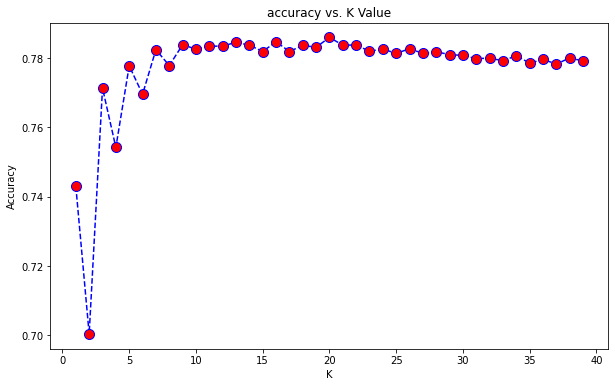

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
acc=[]
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 19).fit(X_train,y_train)

f1_train = knn.predict(X_train)
f1_test = knn.predict(X_test)

knn_train = metrics.f1_score(y_train, f1_train)
knn_test = metrics.f1_score(y_test, f1_test)
print('Test Accuracy score: ', metrics.accuracy_score(y_test, f1_test))
print('Train F1 score: ', knn_train)
print('Test F1 score: ', knn_test)


Test Accuracy score:  0.7831335918223475
Train F1 score:  0.8727528399691188
Test F1 score:  0.8653056756608833


Random test case


In [ ]:
d = np.array([ 30,          16,          1,           1,           0,
    0,        1,           6,           1,          0,
    6,       9,          41.87565854, -87.62440494])
test_random = knn.predict(d.reshape(1,-1))
test_random

array([0])

##Support vector machines

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
svm = Pipeline([
("scaler", StandardScaler()),
("linear_svc", LinearSVC(C=1, loss="hinge")),
])
svm.fit(X_train,y_train)
f1_train = svm.predict(X_train)
f1_test = svm.predict(X_test)

svm_train = metrics.f1_score(y_train, f1_train)
svm_test = metrics.f1_score(y_test, f1_test)
print('Test Accuracy score: ', metrics.accuracy_score(y_test, f1_test))
print('Train F1 score: ', svm_train)
print('Test F1 score: ', svm_test)


Test Accuracy score:  0.8610327811068029
Train F1 score:  0.9111086873534384
Test F1 score:  0.9141768707482993


In [ ]:
d = np.array([ 30,          16,          1,           1,           0,
    0,        1,           6,           1,          0,
    6,       9,          41.87565854, -87.62440494])

test_random = svm.predict(d.reshape(1,-1))
test_random

array([1])

##Gaussian Naive bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

nb.fit(X_train, y_train)
f1_train = nb.predict(X_train)
f1_test = nb.predict(X_test)

nb_train = metrics.f1_score(y_train, f1_train)
nb_test = metrics.f1_score(y_test, f1_test)
print('Test Accuracy score: ', metrics.accuracy_score(y_test, f1_test))
print('Train F1 score: ', nb_train)
print('Test F1 score: ', nb_test)

Test Accuracy score:  0.8577722946774762
Train F1 score:  0.9092848935820977
Test F1 score:  0.9118514472965593


In [ ]:
d = np.array([ 30,          16,          1,           1,           0,
    0,        1,           6,           1,          0,
    6,       9,          41.87565854, -87.62440494])
test_random = nb.predict(d.reshape(1,-1))
test_random

array([1])

#Neutral network

In [ ]:
import tensorflow as tf
from tensorflow import keras
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)
print(X_test[:3])
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)
print(X_test[:3])

input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

model.compile(loss="mean_squared_error", optimizer="sgd",metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

[[ 30.          16.           1.           4.          17.
    0.           1.          19.           1.          16.
    3.          11.          41.65912619 -87.55943274]
 [ 30.           4.           9.           1.           7.
    4.           1.          38.           1.          17.
    7.           1.          41.68555589 -87.61100289]
 [ 30.          16.           1.           1.           0.
    0.           1.           6.           1.           0.
    6.           9.          41.87565854 -87.62440494]]
[[ 0.13091451  0.96130928 -0.39188486  1.54921815  1.1817893  -0.45623434
  -0.12860934 -0.08814949 -0.34461853  0.45436659 -0.61996082  1.24550199
  -2.21883438  1.80683121]
 [ 0.13091451 -1.07562094  3.75383928 -1.43513316 -0.57590845  1.72999128
  -0.12860934  2.83681772 -0.34461853  0.63841542  1.37338271 -1.8685701
  -1.89820024  0.97122053]
 [ 0.13091451  0.96130928 -0.39188486 -1.43513316 -1.80629687 -0.45623434
  -0.12860934 -2.08944283 -0.34461853 -2.4904147   0.8750

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round()

array([[1.],
       [1.],
       [0.]], dtype=float32)